In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
import ipywidgets as widgets
from IPython.display import display
import os
from collections import defaultdict
from tqdm import tqdm  

Inital File Set Orgnaizaiton

In [2]:
# Dictionary to store file paths organized by patient name/MRN
patient_files = defaultdict(lambda: defaultdict(list))

directories = ["D:\\CTH_archive\\TMAX_DICOM", "D:\\CTH_archive\\CTH_DICOM", "D:\\CTH_archive\\CTP_DICOM"]
directory_names = ["TMAX_DICOM", "CTH_DICOM", "CTP_DICOM"]

for directory, dir_name in zip(directories, directory_names):
    print(f"Processing directory: {directory}")
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                # Split the path to extract the patient name
                parts = root.split("\\")
                # Find the index of the main directory to ensure the patient name is correctly extracted
                try:
                    index = parts.index(dir_name) + 1
                    patient_name = parts[index]
                    patient_files[patient_name][dir_name].append(file_path)
                except (IndexError, ValueError) as e:
                    print(f"Error processing {file_path}: {e}")
    else:
        print(f"Error: Directory {directory} does not exist")

# Filter patients with files in all three directories
patients_with_all_folders = [
    patient for patient, folders in patient_files.items()
    if set(folders.keys()) == set(directory_names)
]

print("Number of patients with all folders:", len(patients_with_all_folders))

# Print the organized file paths for patients with files in all three folders

#for patient in patients_with_all_folders:
#    print(f"Patient: {patient}")
#    for folder, file_paths in patient_files[patient].items():
#        print(f"  {folder}:")
#        for file_path in file_paths:
#            print(f"    {file_path}")
#    print()

# Dictionary to store file paths organized by patient name/MRN
patient_files = defaultdict(lambda: defaultdict(list))

directories = ["D:\\CTH_archive\\TMAX_DICOM", "D:\\CTH_archive\\CTH_DICOM", "D:\\CTH_archive\\CTP_DICOM"]
directory_names = ["TMAX_DICOM", "CTH_DICOM", "CTP_DICOM"]

for directory, dir_name in zip(directories, directory_names):
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                # Split the path to extract the patient name
                parts = root.split("\\")
                # Find the index of the main directory to ensure the patient name is correctly extracted
                try:
                    index = parts.index(dir_name) + 1
                    patient_name = parts[index]
                    patient_files[patient_name][dir_name].append(file_path)
                except (IndexError, ValueError) as e:
                    print(f"Error processing {file_path}: {e}")
    else:
        print(f"Error: Directory {directory} does not exist")

# Filter patients with files in all three directories and store in a new variable
filtered_patient_files = {
    patient: folders for patient, folders in patient_files.items()
    if set(folders.keys()) == set(directory_names)
}

Processing directory: D:\CTH_archive\TMAX_DICOM
Processing directory: D:\CTH_archive\CTH_DICOM
Processing directory: D:\CTH_archive\CTP_DICOM
Number of patients with all folders: 85


In [3]:
def read_dicom_series(directory):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(directory)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()

    if image.GetNumberOfComponentsPerPixel() > 1:
        channels = [sitk.VectorIndexSelectionCast(image, i) for i in range(image.GetNumberOfComponentsPerPixel())]
        image = sum(channels) / len(channels)

    image = sitk.Cast(image, sitk.sitkFloat32)
    return image


In [4]:
#resampled_images = {}  # To store the resampled images for each patient
#
## Wrap the main loop with tqdm for a progress bar
#for patient in tqdm(patients_with_all_folders, desc='Processing Patients'):
#    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
#        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
#        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])
#
#        print(f"Reading DICOM series for patient: {patient}")
#        moving_image = read_dicom_series(ctp_dicom_directory)
#        fixed_image = read_dicom_series(cth_dicom_directory)
#
#        # Use CenteredTransformInitializer to improve the initial alignment
#        initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#                                                              moving_image,
#                                                              sitk.Euler3DTransform(),
#                                                              sitk.CenteredTransformInitializerFilter.GEOMETRY)
#
#        # Initialize the registration method
#        registration_method = sitk.ImageRegistrationMethod()
#        registration_method.SetInitialTransform(initial_transform, inPlace=False)
#
#        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
#        registration_method.SetMetricSamplingPercentage(0.4, sitk.sitkWallClock)
#        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
#        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=500, convergenceMinimumValue=1e-6, convergenceWindowSize=20)
#        registration_method.SetOptimizerScalesFromPhysicalShift()
#        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[16, 8, 4, 2])
#        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[5, 4, 2, 1])
#        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
#
#        # Execute the registration
#        try:
#            print(f"Registering images for patient: {patient}")
#            final_transform = registration_method.Execute(fixed_image, moving_image)
#            print(f"Registration successful for patient: {patient}")
#        except RuntimeError as e:
#            print(f"Registration failed for patient {patient}: {e}")
#            continue  # Skip this patient and continue with the next one
#
#        # Resample the moving image using the final transform
#        resampled_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
#
#        # Store the resampled image for this patient
#        resampled_images[patient] = resampled_image
#

In [5]:
#resampled_images = {}  
#transforms_dir = r'D:\CTH_archive\Transforms'  # Directory to save the transforms
#resampled_images_transform = {}  # To store the paths to the resampled images for each patient
#
## Ensure the directory for storing transforms exists
#if not os.path.exists(transforms_dir):
#    os.makedirs(transforms_dir)
#
#for patient in tqdm(patients_with_all_folders, desc='Processing Patients'):
#    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
#        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
#        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])
#
#        moving_image = read_dicom_series(ctp_dicom_directory)
#        fixed_image = read_dicom_series(cth_dicom_directory)
#
#        initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#                                                              moving_image,
#                                                              sitk.Euler3DTransform(),
#                                                              sitk.CenteredTransformInitializerFilter.GEOMETRY)
#        #initial_transform = sitk.CenteredTransformInitializer(fixed_image, moving_image, sitk.AffineTransform(3), sitk.CenteredTransformInitializerFilter.MOMENTS)
#        #initial_transform = sitk.CenteredTransformInitializer(fixed_image,
#        #                                                      moving_image,
#        #                                                      sitk.Euler3DTransform(),
#        #                                                      sitk.CenteredTransformInitializerFilter.MOMENTS)
#                
#        registration_method = sitk.ImageRegistrationMethod()
#        registration_method.SetInitialTransform(initial_transform, inPlace=False)
#        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
#        registration_method.SetMetricSamplingPercentage(0.4, sitk.sitkWallClock)
#        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
#        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=1000, convergenceMinimumValue=1e-6, convergenceWindowSize=20)
#        registration_method.SetOptimizerScalesFromPhysicalShift()
#        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[16, 8, 4, 2])
#        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[5, 4, 2, 1])
#        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()
#
#        try:
#            final_transform = registration_method.Execute(fixed_image, moving_image)
#
#            # Save the final transform to a file
#            transform_file = os.path.join(transforms_dir, f'{patient}_transform.tfm')
#            sitk.WriteTransform(final_transform, transform_file)
#
#            # Resample the moving image using the final transform
#            resampled_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
#            # Store the resampled image for this patient
#            resampled_images[patient] = resampled_image
#            
#            # Store the path to the transform file instead of the transform object
#            resampled_images_transform[patient] = transform_file
#            print(f"Registration successful for patient: {patient}. Transform saved to {transform_file}")
#        except RuntimeError as e:
#            print(f"Registration failed for patient {patient}: {e}")
#            continue
#        

In [27]:
transforms_dir = r'D:\CTH_archive\Transforms'  # Directory to save the transforms
if not os.path.exists(transforms_dir):
    os.makedirs(transforms_dir)

resampled_images = {}  # To store the resampled images for each patient
resampled_images_transform = {}  # To store the transform files for each patient

for patient in tqdm(patients_with_all_folders[10:30], desc='Processing Patients'):
    if 'CTP_DICOM' in patient_files[patient] and 'CTH_DICOM' in patient_files[patient]:
        ctp_dicom_directory = os.path.dirname(patient_files[patient]['CTP_DICOM'][0])
        cth_dicom_directory = os.path.dirname(patient_files[patient]['CTH_DICOM'][0])

        moving_image = read_dicom_series(ctp_dicom_directory)
        fixed_image = read_dicom_series(cth_dicom_directory)

                # Read DICOM series and apply histogram normalization
        moving_image = read_dicom_series(ctp_dicom_directory)
        moving_image_min = float(sitk.GetArrayFromImage(moving_image).min())
        moving_image_max = float(sitk.GetArrayFromImage(moving_image).max())
        moving_image = sitk.IntensityWindowing(moving_image,
                                            windowMinimum=moving_image_min,
                                            windowMaximum=moving_image_max,
                                            outputMinimum=0.0,
                                            outputMaximum=1.0)

        fixed_image = read_dicom_series(cth_dicom_directory)
        fixed_image_min = float(sitk.GetArrayFromImage(fixed_image).min())
        fixed_image_max = float(sitk.GetArrayFromImage(fixed_image).max())
        fixed_image = sitk.IntensityWindowing(fixed_image,
                                            windowMinimum=fixed_image_min,
                                            windowMaximum=fixed_image_max,
                                            outputMinimum=0.0,
                                            outputMaximum=1.0)

        # Initialize the registration method
        registration_method = sitk.ImageRegistrationMethod()

        # Set the Metric, Optimizer, and Interpolator
        registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
        registration_method.SetMetricSamplingPercentage(1.0, sitk.sitkWallClock)
        registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
        registration_method.SetOptimizerAsGradientDescentLineSearch(learningRate=0.5, numberOfIterations=500,
                                                                     convergenceMinimumValue=1e-6, convergenceWindowSize=20)
        registration_method.SetOptimizerScalesFromPhysicalShift()

        # Enhanced multi-resolution strategy
        registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[16, 8, 4, 2])
        registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[5, 4, 2, 1])
        registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

        # Compute the centers of the images and set the initial transform based on center alignment
        initial_transform = sitk.CenteredTransformInitializer(fixed_image, moving_image,
                                                              sitk.AffineTransform(fixed_image.GetDimension()),
                                                              sitk.CenteredTransformInitializerFilter.MOMENTS)
        registration_method.SetInitialTransform(initial_transform)

        try:
            # Execute the affine registration with refined settings
            final_transform = registration_method.Execute(fixed_image, moving_image)

            # Resample using the final transform
            resampled_image = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
            resampled_images[patient] = resampled_image

            # Save the final transform to a file
            transform_file = os.path.join(transforms_dir, f'{patient}_transform.h5')
            sitk.WriteTransform(final_transform, transform_file)
            resampled_images_transform[patient] = transform_file

            print(f"Registration successful for patient: {patient}. Transform saved to {transform_file}")
        except RuntimeError as e:
            print(f"Registration failed for patient {patient}: {e}")


Processing Patients:   5%|▌         | 1/20 [00:21<06:51, 21.67s/it]

Registration successful for patient: CHEN_XIU_D 6497146. Transform saved to D:\CTH_archive\Transforms\CHEN_XIU_D 6497146_transform.h5


Processing Patients:  10%|█         | 2/20 [00:45<06:49, 22.76s/it]

Registration successful for patient: CHOWDHURY_SALMA_K 7027943. Transform saved to D:\CTH_archive\Transforms\CHOWDHURY_SALMA_K 7027943_transform.h5


In [17]:
def display_image_slices(fixed_image, moving_image, transformed_image):
    # Convert SimpleITK images to arrays for easier manipulation
    fixed_image_array = sitk.GetArrayFromImage(fixed_image)
    moving_image_array = sitk.GetArrayFromImage(moving_image)
    transformed_image_array = sitk.GetArrayFromImage(transformed_image)

    # Determine the maximum number of slices from all images to set the slider range
    max_slices = max(fixed_image.GetSize()[2], moving_image.GetSize()[2], transformed_image.GetSize()[2])

    # Define a function to update the displayed images when the slider is moved
    def update_slice(slice_idx):
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        if slice_idx < fixed_image_array.shape[0]:
            axs[0].imshow(fixed_image_array[slice_idx], cmap='gray')
            axs[0].set_title('Fixed Image')
        else:
            axs[0].text(0.5, 0.5, 'Slice not available', horizontalalignment='center', verticalalignment='center')
            axs[0].set_title('Fixed Image')

        if slice_idx < transformed_image_array.shape[0]:
            axs[1].imshow(transformed_image_array[slice_idx], cmap='gray')
            axs[1].set_title('Transformed Moving Image')
        else:
            axs[1].text(0.5, 0.5, 'Slice not available', horizontalalignment='center', verticalalignment='center')
            axs[1].set_title('Transformed Moving Image')

        if slice_idx < moving_image_array.shape[0]:
            axs[2].imshow(moving_image_array[slice_idx], cmap='gray')
            axs[2].set_title('Moving Image')
        else:
            axs[2].text(0.5, 0.5, 'Slice not available', horizontalalignment='center', verticalalignment='center')
            axs[2].set_title('Moving Image')

        for ax in axs:
            ax.axis('off')

        plt.show()

    # Create a slider widget for slice selection
    slice_slider = widgets.IntSlider(min=0, max=max_slices-1, step=1, value=max_slices//2, description='Slice')

    # Display the widget and use `interactive_output` to connect the slider with the update function
    interactive_output = widgets.interactive_output(update_slice, {'slice_idx': slice_slider})
    display(slice_slider, interactive_output)

In [23]:
patient_id = "HATTA_MARIA A224090"

ctp_dicom_directory = os.path.dirname(patient_files[patient_id]['CTP_DICOM'][0])
cth_dicom_directory = os.path.dirname(patient_files[patient_id]['CTH_DICOM'][0])

moving_image = read_dicom_series(ctp_dicom_directory)
fixed_image = read_dicom_series(cth_dicom_directory)

# Getting the transformed (resampled) image from your results
transformed_image = resampled_images[patient_id]

display_image_slices(fixed_image, moving_image, transformed_image)

IntSlider(value=16, description='Slice', max=31)

Output()

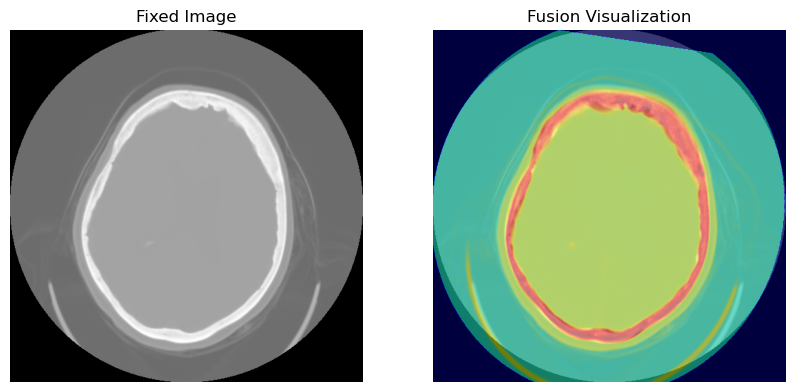

In [24]:
def display_fusion(fixed_image, registered_image):
    fixed_array = sitk.GetArrayFromImage(fixed_image)
    registered_array = sitk.GetArrayFromImage(registered_image)

    # Ensure the images are in the same size for overlay
    registered_resampled = sitk.Resample(registered_image, fixed_image)

    # Convert SimpleITK images to arrays
    fixed_array = sitk.GetArrayFromImage(fixed_image)
    registered_array = sitk.GetArrayFromImage(registered_resampled)

    # Choose a slice in the middle of the volume to display
    slice_idx = fixed_array.shape[0] // 2

    # Create a fusion image by overlaying the registered image on the fixed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(fixed_array[slice_idx], cmap='gray')
    plt.title('Fixed Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(fixed_array[slice_idx], cmap='gray')
    plt.imshow(registered_array[slice_idx], cmap='jet', alpha=0.5)  # Adjust alpha for transparency
    plt.title('Fusion Visualization')
    plt.axis('off')

    plt.show()
    
display_fusion(fixed_image, transformed_image)

In [25]:
def convert_series_to_nifti(input_directory, output_file):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(input_directory)
    reader.SetFileNames(dicom_names)
    image_series = reader.Execute()
    
    # Convert to numpy array to manipulate the pixel data directly
    img_array = sitk.GetArrayFromImage(image_series)

    # Check if the image needs to be converted to grayscale
    if image_series.GetNumberOfComponentsPerPixel() > 1:
        img_array = np.mean(img_array, axis=-1).astype(np.uint16)

        img_array[:, :35, :] = 0  # Remove TAMX label
        img_array[:, :, :35] = 0 # Remove scale on  the left
    
    # Convert the numpy array back to a SimpleITK Image
    processed_image = sitk.GetImageFromArray(img_array)
    processed_image.SetSpacing(image_series.GetSpacing())
    processed_image.SetOrigin(image_series.GetOrigin())
    processed_image.SetDirection(image_series.GetDirection())

    # Write the processed image as a NIfTI file
    sitk.WriteImage(processed_image, output_file)

root_directory = r'D:\CTH_archive\TMAX_DICOM'

for patient_dir in os.listdir(root_directory):
    patient_path = os.path.join(root_directory, patient_dir)
    if os.path.isdir(patient_path):
        for series_dir in os.listdir(patient_path):
            series_path = os.path.join(patient_path, series_dir)
            if os.path.isdir(series_path):
                output_nifti_file = os.path.join(patient_path, f"{series_dir}.nii")
                print(f"Converting {series_path} to NIfTI...")
                convert_series_to_nifti(series_path, output_nifti_file)

Converting D:\CTH_archive\TMAX_DICOM\ALFORD_BARBARA 4024996\2019-11-30 163115 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\ALLAH_MAJUSTICE 2621774\2020-07-21 200446 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\BATTLE_MARIA 8399298\2021-01-03 084826 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\BAUM_ROBERT 6035108\2019-09-13 120851 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\BILLIPS_JAMES 6272788\2019-11-18 013135 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\BOGER_DAVID_S 2532249\2020-06-04 094429 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\BROWN_ANTHONY F341525\2021-06-08 145657 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\CAMPAGNA_HARRY_D E304749\2020-08-06 093205 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\CANIGLIA_ROBERT 2363078\2021-06-19 083144 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\CARDIN_PAUL E570140\2019-09-04 222849 to NIfTI...
Converting D:\CTH_archive\TMAX_DICOM\CHANG_WAH_KONG 5708968\2021-03-08 190012 to NIfTI...
Converting D:\CTH

In [ ]:
output_dir = os.path.join(r'D:\CTH_archive\Registered_NIfTI')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

successful_patients = list(resampled_images.keys())[:3]

for patient_id in successful_patients:
    patient_directory = os.path.join(r'D:\CTH_archive\TMAX_DICOM', patient_id)
    
    nifti_files = [f for f in os.listdir(patient_directory) if f.endswith('.nii')]
    if not nifti_files:
        print(f"No NIfTI file found for patient {patient_id}.")
        continue

    nifti_file = nifti_files[0]
    nifti_file_path = os.path.join(patient_directory, nifti_file)
    moving_image = sitk.ReadImage(nifti_file_path)
    
    ctp_directory_base = os.path.join(r'D:\CTH_archive\CTP_DICOM', patient_id)
    study_dirs = [d for d in os.listdir(ctp_directory_base) if os.path.isdir(os.path.join(ctp_directory_base, d))]
    if not study_dirs:
        print(f"No CTP study found for patient {patient_id} in {ctp_directory_base}.")
        continue

    ctp_directory = os.path.join(ctp_directory_base, study_dirs[0])
    ctp_image = read_dicom_series(ctp_directory)

    fixed_image_base_dir = os.path.join(r'D:\CTH_archive\CTH_DICOM', patient_id)
    
    series_dirs = [d for d in os.listdir(fixed_image_base_dir) if os.path.isdir(os.path.join(fixed_image_base_dir, d))]
    if not series_dirs:
        print(f"No DICOM series found for patient {patient_id} in {fixed_image_base_dir}.")
        continue

    fixed_image_dir = os.path.join(fixed_image_base_dir, series_dirs[0])
    fixed_image = read_dicom_series(fixed_image_dir)
    print(f"Fixed image file: {fixed_image_dir}")
    
    plt.imshow(sitk.GetArrayFromImage(fixed_image)[10,:,:])
    print(f"Size of fixed image: {fixed_image.GetSize()}")
    
    desired_size = [512, 512, moving_image.GetSize()[2]]
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(moving_image)
    resampler.SetSize(desired_size)
    resampler.SetOutputSpacing([moving_image.GetSpacing()[i] * (moving_image.GetSize()[i] / desired_size[i]) for i in range(3)])
    resampler.SetTransform(sitk.Transform())
    resampler.SetInterpolator(sitk.sitkLinear)
    resized_image = resampler.Execute(moving_image)
    
    resized_image.SetSpacing(ctp_image.GetSpacing())
    resized_image.SetOrigin(ctp_image.GetOrigin())
    print(f"rezided image size: {resized_image.GetSize()}")
    print(f"rezided image spacing: {resized_image.GetSpacing()}")
    print(f"resized image origin: {resized_image.GetOrigin()}") 
    # Load the final transform from the file path stored in resampled_images
    transform_file_path = resampled_images_transform[patient_id]
    if os.path.exists(transform_file_path):
        print(f"Loading transform from {transform_file_path}")
        final_transform = sitk.ReadTransform(transform_file_path)
    else:
        print(f"Transform file for patient {patient_id} not found at {transform_file_path}.")
        continue

    resampled_image = sitk.Resample(resized_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, resized_image.GetPixelID())
    output_path = os.path.join(output_dir, os.path.basename(patient_directory) + '_registered.nii')

    sitk.WriteImage(resampled_image, output_path)

    print(f"Processed and saved registered image for patient: {patient_id}")